In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, log_loss, silhouette_score, mean_squared_error
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaseEnsemble, VotingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.cluster.hierarchy import linkage, dendrogram
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import AgglomerativeClustering, KMeans
from statsmodels.tsa.api import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

In [61]:
df = pd.read_csv(r"..\Datasets\sales-of-shampoo-over-a-three-ye.csv")
df.head()

,Month,Sales of shampoo over a three year period
0,2001-01-01,266.0
1,2001-02-01,145.9
2,2001-03-01,183.1
3,2001-04-01,119.3
4,2001-05-01,180.3


In [62]:
y_train = df['Sales of shampoo over a three year period'][:-5]
y_test = df['Sales of shampoo over a three year period'][-6:]

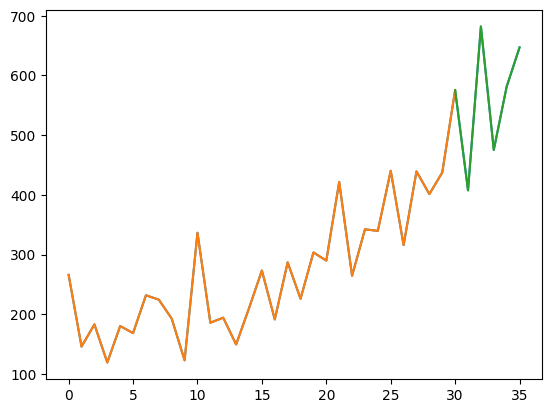

In [63]:
plt.plot(df['Sales of shampoo over a three year period'])
plt.plot(y_train)
plt.plot(y_test)


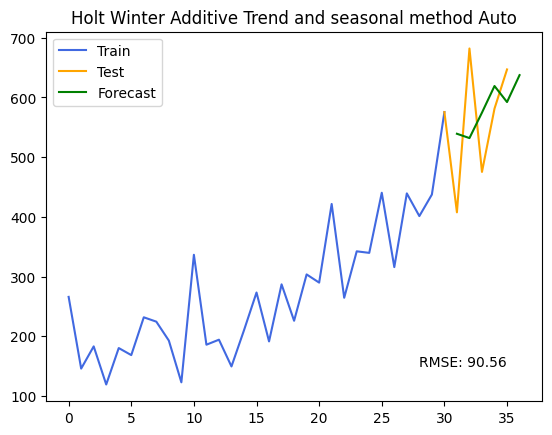

{'smoothing_level': 0.2357123282836287, 'smoothing_trend': 0.23513016185758592, 'smoothing_seasonal': 0.014228502409617106, 'damping_trend': nan, 'initial_level': 198.2513893137373, 'initial_trend': -4.595164443783342, 'initial_seasons': array([ 10.59062627, -17.44474203, -35.72486071,  -5.08473583,
       -34.56033328,  -5.16812914,  30.18878541,  29.83097244,
        -0.89306925,  18.19751753,  39.37799922, -11.06359711]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
90.5610606224959


In [64]:

from math import sqrt
from statsmodels.tsa.api import Holt

holt_add = ExponentialSmoothing(y_train, seasonal_periods=12,
                                trend='add', seasonal='add')
fit1 = holt_add.fit()

fcast1 = fit1.forecast(len(y_test))

y_train.plot(color= 'royalblue', label = 'Train')
y_test.plot(color= 'orange', label = 'Test')
fcast1.plot(color= 'green', label = 'Forecast')

error = round(sqrt(mean_squared_error(y_test, fcast1)),2)
plt.text(28,150, 'RMSE: '+str(error))
plt.title('Holt Winter Additive Trend and seasonal method Auto')
plt.legend(loc = 'best')
plt.show()

print(fit1.params)
res = sqrt(mean_squared_error(y_test, fcast1))
print(res)

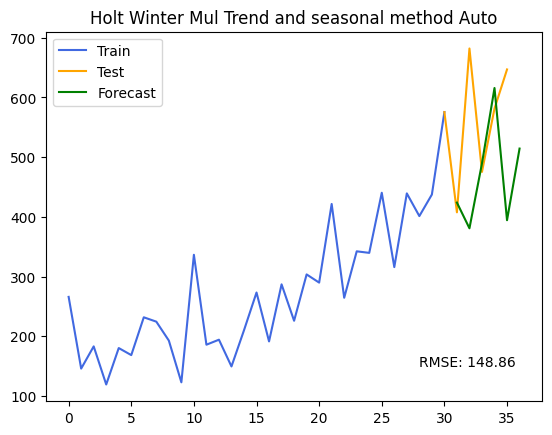

{'smoothing_level': 0.11467548251201783, 'smoothing_trend': 0.11454412216929272, 'smoothing_seasonal': 0.066245010766401, 'damping_trend': nan, 'initial_level': 179.30956111251766, 'initial_trend': 2.9772904656490335, 'initial_seasons': array([1.27887425, 1.23814256, 1.09166825, 1.26172746, 1.13277878,
       1.23166068, 1.53428913, 1.18522341, 1.03135042, 1.32368121,
       1.63481908, 0.96837751]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
148.86456761966426


In [65]:
holt_add = ExponentialSmoothing(y_train, seasonal_periods=12,
                                trend='add', seasonal='mul')
fit1 = holt_add.fit()

fcast1 = fit1.forecast(len(y_test))

y_train.plot(color= 'royalblue', label = 'Train')
y_test.plot(color= 'orange', label = 'Test')
fcast1.plot(color= 'green', label = 'Forecast')

error = round(sqrt(mean_squared_error(y_test, fcast1)),2)
plt.text(28,150, 'RMSE: '+str(error))
plt.title('Holt Winter Mul Trend and seasonal method Auto')
plt.legend(loc = 'best')
plt.show()

print(fit1.params)
res = sqrt(mean_squared_error(y_test, fcast1))
print(res)

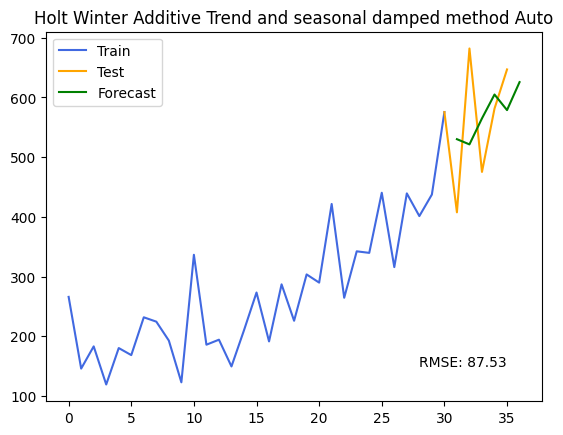

{'smoothing_level': 0.23135678895534836, 'smoothing_trend': 0.2291296682561741, 'smoothing_seasonal': 0.0016210096511074963, 'damping_trend': 0.9928614948527484, 'initial_level': 187.26757194320604, 'initial_trend': -3.073095713122161, 'initial_seasons': array([ 12.07333031, -17.53643823, -35.07610639,  -3.64224045,
       -33.67723428,  -4.28420516,  30.97939901,  25.71247016,
        -5.18427449,  16.35282787,  34.4977231 , -13.26559174]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
87.52611902346848


In [66]:
holt_add = ExponentialSmoothing(y_train, seasonal_periods=12,
                                trend='add', seasonal='add',
                                damped_trend=True)
fit1 = holt_add.fit()

fcast1 = fit1.forecast(len(y_test))

y_train.plot(color= 'royalblue', label = 'Train')
y_test.plot(color= 'orange', label = 'Test')
fcast1.plot(color= 'green', label = 'Forecast')

error = round(sqrt(mean_squared_error(y_test, fcast1)),2)
plt.text(28,150, 'RMSE: '+str(error))
plt.title('Holt Winter Additive Trend and seasonal damped method Auto')
plt.legend(loc = 'best')
plt.show()

print(fit1.params)
res = sqrt(mean_squared_error(y_test, fcast1))
print(res)

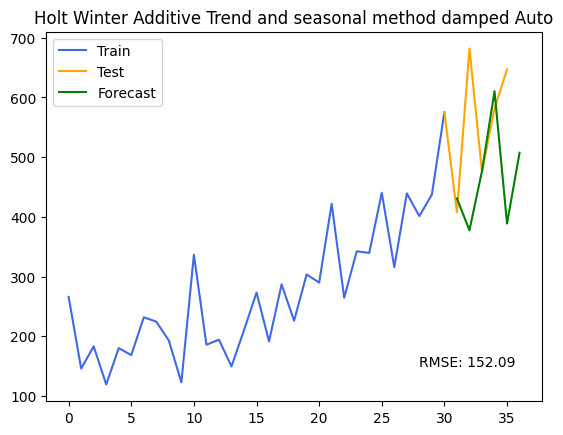

{'smoothing_level': 0.11106863186906704, 'smoothing_trend': 0.11094798029307178, 'smoothing_seasonal': 0.06673200123162465, 'damping_trend': 0.9897935024404823, 'initial_level': 179.93245222462056, 'initial_trend': 3.671091831248496, 'initial_seasons': array([1.28692474, 1.22802873, 1.00298241, 1.1944572 , 1.13248141,
       1.22412492, 1.54129285, 1.2182101 , 1.0307767 , 1.29765413,
       1.64413967, 0.97041585]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
152.09251739036415


In [67]:
holt_add = ExponentialSmoothing(y_train, seasonal_periods=12,
                                trend='add', seasonal='mul',
                                damped_trend=True)
fit1 = holt_add.fit()

fcast1 = fit1.forecast(len(y_test))

y_train.plot(color= 'royalblue', label = 'Train')
y_test.plot(color= 'orange', label = 'Test')
fcast1.plot(color= 'green', label = 'Forecast')

error = round(sqrt(mean_squared_error(y_test, fcast1)),2)
plt.text(28,150, 'RMSE: '+str(error))
plt.title('Holt Winter Additive Trend and seasonal method damped Auto')
plt.legend(loc = 'best')
plt.show()

print(fit1.params)
res = sqrt(mean_squared_error(y_test, fcast1))
print(res)

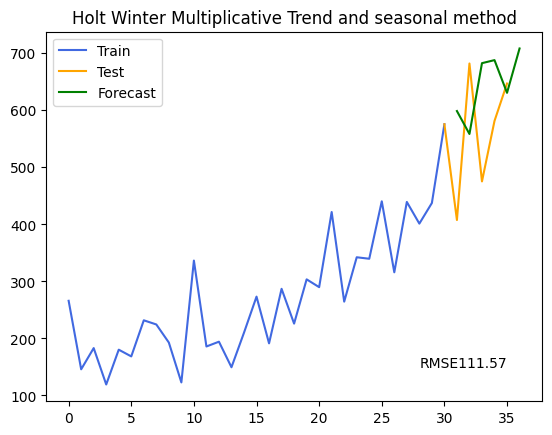

111.56783826607959


In [74]:
alpha = 0.1
beta = 0.95
gamma = 0.3

from math import sqrt
from statsmodels.tsa.api import Holt

holt_mul = ExponentialSmoothing(y_train, seasonal_periods=12,
                                trend='add', seasonal='mul')
fit1 = holt_mul.fit(smoothing_level = alpha, smoothing_trend = beta,
                    smoothing_seasonal = gamma)

fcast1 = fit1.forecast(len(y_test))

y_train.plot(color= 'royalblue', label = 'Train')
y_test.plot(color= 'orange', label = 'Test')
fcast1.plot(color= 'green', label = 'Forecast')

error = round(sqrt(mean_squared_error(y_test, fcast1)),2)
plt.text(28,150, 'RMSE'+str(error))
plt.title('Holt Winter Multiplicative Trend and seasonal method')
plt.legend(loc = 'best')
plt.show()

# print(fit1.params)
res = sqrt(mean_squared_error(y_test, fcast1))
print(res)

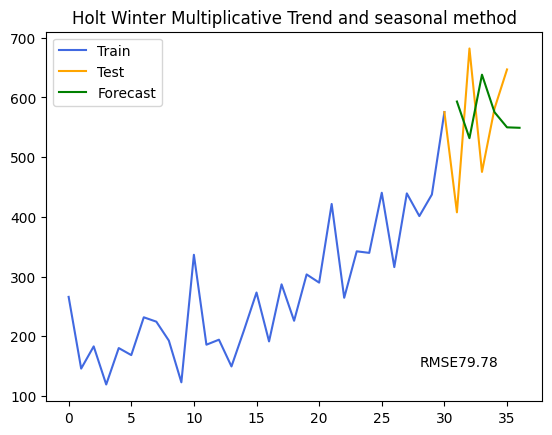

79.77927954256208


In [69]:
alpha = 0.35
beta = 0.01
gamma = 0.55


from math import sqrt
from statsmodels.tsa.api import Holt

holt_mul = ExponentialSmoothing(y_train, seasonal_periods=12,
                                trend='add', seasonal='mul',damped_trend=True)
fit1 = holt_mul.fit(smoothing_level = alpha, smoothing_trend = beta,
                    smoothing_seasonal = gamma)

fcast1 = fit1.forecast(len(y_test))

y_train.plot(color= 'royalblue', label = 'Train')
y_test.plot(color= 'orange', label = 'Test')
fcast1.plot(color= 'green', label = 'Forecast')

error = round(sqrt(mean_squared_error(y_test, fcast1)),2)
plt.text(28,150, 'RMSE'+str(error))
plt.title('Holt Winter Multiplicative Trend and seasonal method')
plt.legend(loc = 'best')
plt.show()

# print(fit1.params)
res = sqrt(mean_squared_error(y_test, fcast1))
print(res)

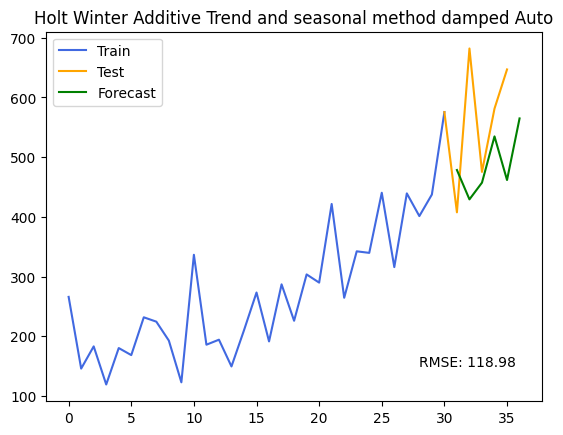

{'smoothing_level': 0.11, 'smoothing_trend': 0.11, 'smoothing_seasonal': 0.06, 'damping_trend': 0.9949999997711442, 'initial_level': 19.519929151733173, 'initial_trend': 0.38575557257228427, 'initial_seasons': array([1.16114738, 1.08810079, 1.05552495, 1.124576  , 1.06600843,
       1.13084918, 1.20669082, 1.16408914, 1.08004683, 1.10040518,
       1.16968896, 1.06843695]), 'use_boxcox': 0.5, 'lamda': 0.5, 'remove_bias': False}
118.98090975289865


In [84]:
holt_add = ExponentialSmoothing(y_train, seasonal_periods=12,
                                trend='add', seasonal='mul',
                                damped_trend=True, use_boxcox=0.5)
fit1 = holt_add.fit(smoothing_level = 0.11, smoothing_trend = 0.11,
                    smoothing_seasonal = 0.06)

fcast1 = fit1.forecast(len(y_test))

y_train.plot(color= 'royalblue', label = 'Train')
y_test.plot(color= 'orange', label = 'Test')
fcast1.plot(color= 'green', label = 'Forecast')

error = round(sqrt(mean_squared_error(y_test, fcast1)),2)
plt.text(28,150, 'RMSE: '+str(error))
plt.title('Holt Winter Additive Trend and seasonal method damped Auto')
plt.legend(loc = 'best')
plt.show()

print(fit1.params)
res = sqrt(mean_squared_error(y_test, fcast1))
print(res)

In [91]:

def solve(alpha, beta, gamma):
    ans = dict()

    for a in np.arange(0, alpha, 0.1):
        for b in np.arange(0, beta, 0.1):
            for g in np.arange(0, gamma, 0.1):
                holt_add = ExponentialSmoothing(y_train, seasonal_periods=12,
                                trend='add', seasonal='mul',
                                                damped_trend=True)
                fit1 = holt_add.fit(smoothing_level = a, smoothing_trend = b,
                                    smoothing_seasonal = g)

                fcast1 = fit1.forecast(len(y_test))
                res = sqrt(mean_squared_error(y_test, fcast1))
                print(res)
                ans.setdefault( res, f'{a}_{b}_{g}')
    return ans
            



In [92]:
sol = solve(1,1,1)


221.67506821982127
215.9484627197933
198.273245184446
208.86376400183295
205.3554123224307
205.5854232834239
202.25798887154855
186.3280398096186
196.13986648719478
190.91025485741918
219.7764666398125
216.20617158131355
212.25003688038404
213.21026777819503
204.05891554697985
202.61703218099476
202.395842556543
199.46710559623622
197.0812770185893
193.76540159415163
219.57603898650447
206.94450207934878
212.21245476130616
210.30565298633894
206.0855849722796
202.755405752896
202.39579982830412
200.88665606620552
198.664254375299
190.67557758482798
220.80247631358
215.50191252371494
206.61370516830524
208.1505651281781
202.47712819157013
202.20473530389413
206.9830449375579
199.64766748136336
197.28545311385867
189.93588308587198
219.81197085624186
220.36765179463268
211.35423860769444
207.02476413207287
204.86117797292022
199.7199847439081
202.39931878066113
199.47014103346368
197.87572462614835
192.13601350068265
219.37808801957573
216.54966088174933
212.30936879563197
211.4003411611

64.45669463120466


'0.1_0.2_0.8'

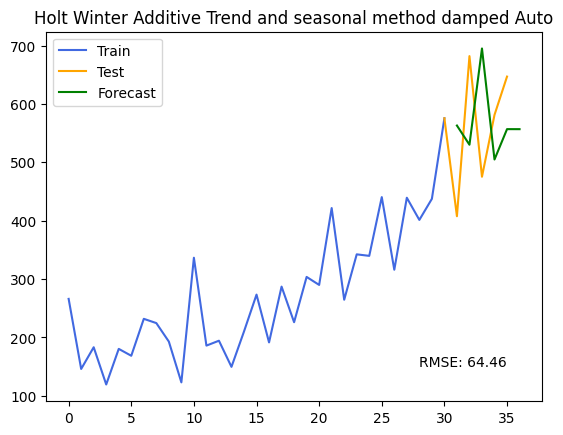

{'smoothing_level': 0.1, 'smoothing_trend': 0.2, 'smoothing_seasonal': 0.8, 'damping_trend': 0.9846786480565306, 'initial_level': 132.49359370716502, 'initial_trend': 2.3123047986993015, 'initial_seasons': array([1.8913746 , 1.20308793, 1.37003946, 1.09948792, 1.2512278 ,
       1.2468456 , 1.50869696, 1.47787785, 1.20490488, 1.10961755,
       1.87916815, 1.37635298]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
64.45669463120466


In [100]:
holt_add = ExponentialSmoothing(y_train, seasonal_periods=12,
                                trend='add', seasonal='mul',
                                damped_trend=True)
fit1 = holt_add.fit(smoothing_level = 0.1, smoothing_trend = 0.2,
                    smoothing_seasonal = 0.8)

fcast1 = fit1.forecast(len(y_test))

y_train.plot(color= 'royalblue', label = 'Train')
y_test.plot(color= 'orange', label = 'Test')
fcast1.plot(color= 'green', label = 'Forecast')

error = round(sqrt(mean_squared_error(y_test, fcast1)),2)
plt.text(28,150, 'RMSE: '+str(error))
plt.title('Holt Winter Additive Trend and seasonal method damped Auto')
plt.legend(loc = 'best')
plt.show()

print(fit1.params)
res = sqrt(mean_squared_error(y_test, fcast1))
print(res)

In [101]:
df =  pd.read_csv(r"..\Datasets\sales-of-shampoo-over-a-three-ye.csv", index_col=0)
df.index = pd.to_datetime(df.index).to_period("M")

<Axes: xlabel='Month'>

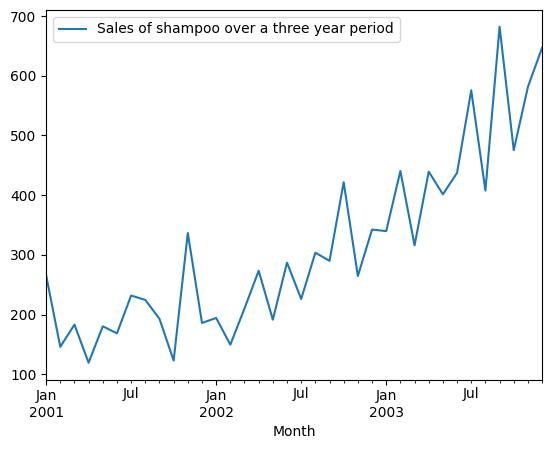

In [102]:
df.plot()

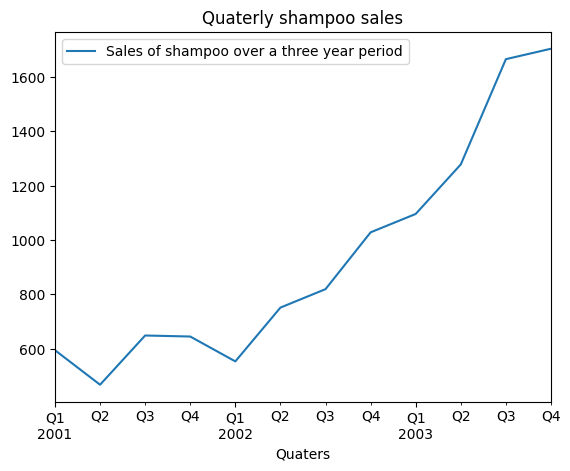

In [104]:
df_qtr = df.resample('Q').sum()
df_qtr.index.rename('Quater', inplace=True)
df_qtr.plot()

plt.title('Quaterly shampoo sales')
plt.xlabel("Quaters")
plt.show()

In [111]:
df_qtr

,Sales of shampoo over a three year period
Quater,
2001Q1,595.0
2001Q2,468.1
2001Q3,649.1
2001Q4,645.3
2002Q1,553.9
2002Q2,751.7
2002Q3,819.5
2002Q4,1028.4
2003Q1,1096.0


In [121]:
y_train = df_qtr['Sales of shampoo over a three year period'][:-3]
y_test = df_qtr['Sales of shampoo over a three year period'][-4:]
y_train

Quater
2001Q1     595.0
2001Q2     468.1
2001Q3     649.1
2001Q4     645.3
2002Q1     553.9
2002Q2     751.7
2002Q3     819.5
2002Q4    1028.4
2003Q1    1096.0
Freq: Q-DEC, Name: Sales of shampoo over a three year period, dtype: float64

TypeError: text() missing 2 required positional arguments: 'y' and 's'

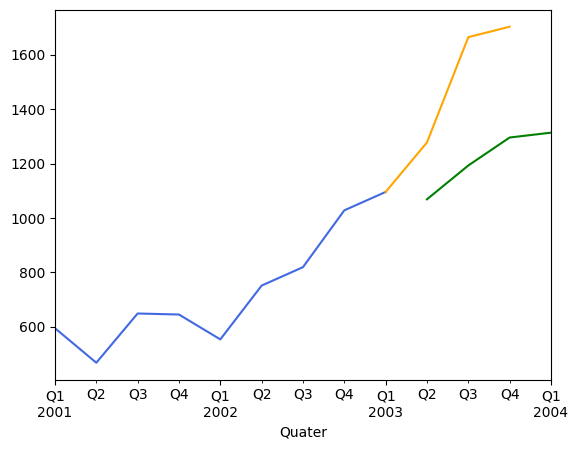

In [125]:
from math import sqrt
from statsmodels.tsa.api import Holt

holt_add = ExponentialSmoothing(y_train, seasonal_periods=4,
                                trend='add', seasonal='add')
fit1 = holt_add.fit()

fcast1 = fit1.forecast(len(y_test))

y_train.plot(color= 'royalblue', label = 'Train')
y_test.plot(color= 'orange', label = 'Test')
fcast1.plot(color= 'green', label = 'Forecast')

error = round(sqrt(mean_squared_error(y_test, fcast1)),2)
plt.text('RMSE: '+str(error))
plt.title('Holt Winter Additive Trend and seasonal method Auto')
plt.legend(loc = 'best')
plt.show()

print(fit1.params)
res = sqrt(mean_squared_error(y_test, fcast1))
print(res)